<a href="https://colab.research.google.com/github/preranavarsha770/Stock-Price-Prediction-using-RNN/blob/master/Stock_price_prediction_using_Rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Data Preprocessing

### Importing the libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [18]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
training_set 


array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [19]:
training_set.shape

(1258, 1)

### Feature Scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler #when there is sigmoid function in the RNN used Normalization is better to use for feature scaling
sc = MinMaxScaler(feature_range = (0, 1)) #0 and 1 becacuse in normalization the result lies between 0 and 1
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a data structure with 60 timesteps and 1 output

In [21]:
#RNN learns from 60 past time steps to predict the one output
X_train = [] #This is the in input which has the 60 past inputs
y_train = [] #This is the output obtained from the 60 past inputs
for i in range(60, 1258): #as each time we get only 60 so we need to start with 60 and 1258 as the rows are 1258
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [22]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

### Reshaping

In [23]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building and Training the RNN

### Importing the Keras libraries and packages

In [24]:
from keras.models import Sequential
from keras.layers import Dense# to add dense layers
from keras.layers import LSTM #To add LSTM layers
from keras.layers import Dropout

### Initialising the RNN

In [25]:
regressor = Sequential() # Regressor is a object of the sequential. We use regressor as we are prediticting continous o/p and classifier is used to predict discreate values

### Adding the first LSTM layer and some Dropout regularisation

In [26]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1))) #50 is the number of neurons in our model,return_sequences = True until we try to add a new layer it should be true and then it should be made faules its ojif not done as default is also false
regressor.add(Dropout(0.2)) # we add dropout to avoid overfitting ,20% of the neurons will be droped out each time.

### Adding a second LSTM layer and some Dropout regularisation

In [27]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [28]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [29]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [30]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [31]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0386
Epoch 2/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0059
Epoch 3/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0049
Epoch 5/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0038
Epoch 8/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0041
Epoch 9/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0035
Epoch 12/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0035
Epoch 13/100
38/38 [=====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [32]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [33]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

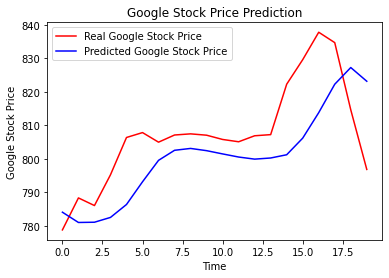

In [34]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()